In [1]:
# Temel kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Bu çalışmada Self-organizing map kullanılarak fraud detection uygulaması yapılacaktır.

In [2]:
# Veri yükleme

'''
# veri hakkında detaylı bilgi
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

Data Set Information:

This file concerns credit card applications. All attribute names and values have been changed 
to meaningless symbols to protect confidentiality of the data. 
This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small 
numbers of values, and nominal with larger numbers of values. There are also a few missing values.
Attribute Information:

There are 6 numerical and 8 categorical attributes. The labels have been changed for the convenience of the statistical algorithms. For example, attribute 4 originally had 3 labels p,g,gg and these have been changed to labels 1,2,3. 

A1: 0,1 CATEGORICAL (formerly: a,b) 
A2: continuous. 
A3: continuous. 
A4: 1,2,3 CATEGORICAL (formerly: p,g,gg) 
A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x) 
A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z) 
A7: continuous. 
A8: 1, 0 CATEGORICAL (formerly: t, f) 
A9: 1, 0	CATEGORICAL (formerly: t, f) 
A10: continuous. 
A11: 1, 0	CATEGORICAL (formerly t, f) 
A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p) 
A13: continuous. 
A14: continuous. 
A15: 1,2 class attribute (formerly: +,-)
'''
dataset = pd.read_csv("C:\\Users\\toshiba\\SkyDrive\\veribilimi.co\\Datasets\\Udemy_A_Z_Deep_Learning\\Credit_Card_Applications.csv")

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# Veri Setini Hedef ve Nitelikler olarak ikiye ayırma

In [7]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [12]:
print(X.shape, y.shape)

(690, 15) (690,)


# Feature Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Self-organizing Map Eğitimek

In [15]:
# Aşağıdaki kütüphane açık kaynak olarak SOM yapımı için hazırlanmış. Onu indirip çalışma diznine .py uzantılı
# dosyayı kopyaladık. Veri seti küçük olduğu için X deki input_len 15, 
# sigma dairenin çapı
# learning_rate = 0.5 yüksek ise faster, lower longer time to take build 
# decay_function=None, random_seed=None
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [16]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration=100 )

# Sonuçları Görselleştirme

In [18]:
from pylab import bone, pcolor, colorbar, plot, show
%matplotlib inline

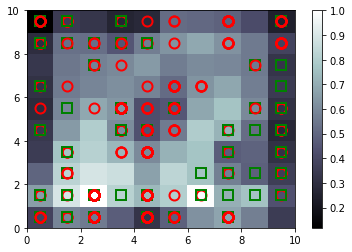

In [25]:
bone()
pcolor(som.distance_map().T)
colorbar()
# Beyaz kareler outliers temsil ediyor
markers = ['o','s']
colors = ['r','g']
# i her bir satırı, x ise her bir 
for i, x in enumerate(X):
    # sıfırıncı satırda kazanansa w'ye koordinatlarını at
    w = som.winner(x)
    # w[0] x ekseni, w[1] ise ye ekseni temsil eder yanlarındaki +0.5 hücreyi ortalamak için
    # y[i] 1 ise markers s olacak
    plot(w[0] + 0.5, w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

# Fraudları Bulma

In [29]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(2,1)], mappings[(6,1)]), axis=0)

In [31]:
frauds = sc.inverse_transform(frauds)
frauds

AttributeError: 'numpy.ndarray' object has no attribute 'head'